# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Mentoría 16 - ¿Cómo identificar fuga de ventas? Inteligencia artificial aplicada al sector comercial.

### Análisis y visualización de datos (TP1 - Parte 2: adsada)

**Integrantes:**
- Canalis, Patricio.
- Chevallier-Boutell, Ignacio José.
- Villarroel Torrez, Daniel.

**Mentores:**
- Gonzalez, Lucía
- Lahoz, Nahuel

---

## Librerías

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress as LR
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

## Dataset

In [2]:
url = 'https://www.dropbox.com/scl/fi/684jriu2g52lqyv45z53s/ven_cln_map.csv?dl=1&rlkey=hr7lcqja46a9fj5bdx7ofdgah'
ventas = pd.read_csv(url, index_col=0)

In [3]:
# Discrimanción por tipo de variables
temp_cols = ['Año', 'Mes']
ven_temp = ventas[temp_cols]

cat_cols = ['ID', 'DGR', 'Categoria', 'Trat_Fisc_Agg', 'Trat_Fisc', 'Trat_Dif',
'CM', 'Deposito', 'Modelo']
ven_cat = ventas[cat_cols]

num_cols = ['Ventas', 'Alicuota', 'Comision']
ven_num = ventas[num_cols]

---
# Análisis de variables numéricas

### Estadística descriptiva (sin considerar series temporales)

In [4]:
ven_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ventas,431506.0,7.544169e+06,4.837341e+07,-2.399305e+08,0.00,90996.38,3.226319e+06,4.876872e+09
Alicuota,431506.0,3.227742e+00,2.681121e+00,0.000000e+00,0.05,4.00,4.750000e+00,1.800000e+01
Comision,431506.0,2.938406e+05,1.860464e+06,-4.904327e+06,0.00,3503.35,1.268750e+05,2.438436e+08


In [5]:
print('z-Score de los extremos de la variables numéricas:') 
for col in num_cols:
    zScore_min = (ven_num[col].min() - ven_num[col].mean()) / ven_num[col].std()
    zScore_max = (ven_num[col].max() - ven_num[col].mean()) / ven_num[col].std()

    print(f'\t{col}:')
    print(f'\t\t Mínimo: {zScore_min:.0f} \t Máximo: {zScore_max:.0f}')

z-Score de los extremos de la variables numéricas:
	Ventas:
		 Mínimo: -5 	 Máximo: 101
	Alicuota:
		 Mínimo: -1 	 Máximo: 6
	Comision:
		 Mínimo: -3 	 Máximo: 131


In [6]:
print('Proporción de valores negativos, nulos y positivos en las variables numéricas:') 
for col in num_cols:
    print(f'\t{col}')
    ans = len(ven_num[col])
    neg = len(ven_num[ven_num[col] < 0])
    nul = len(ven_num[ven_num[col] == 0])

    cant = [neg, nul, neg+nul, ans-neg-nul, ans]
    prop = [f'{100*neg/ans:.2f}%', f'{100*nul/ans:.2f}%', f'{100*(nul+neg)/ans:.2f}%', f'{100*(ans-nul-neg)/ans:.2f}%', '100.00%']
    desc = pd.DataFrame([cant, prop], columns=['Negativos', 'Nulos', 'No positivos', 'Positivos', 'Total'], index=['Cantidad', 'Proporcion'])
    display(desc)


Proporción de valores negativos, nulos y positivos en las variables numéricas:
	Ventas


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,1390,181058,182448,249058,431506
Proporcion,0.32%,41.96%,42.28%,57.72%,100.00%


	Alicuota


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,0,2757,2757,428749,431506
Proporcion,0.00%,0.64%,0.64%,99.36%,100.00%


	Comision


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,1363,183486,184849,246657,431506
Proporcion,0.32%,42.52%,42.84%,57.16%,100.00%


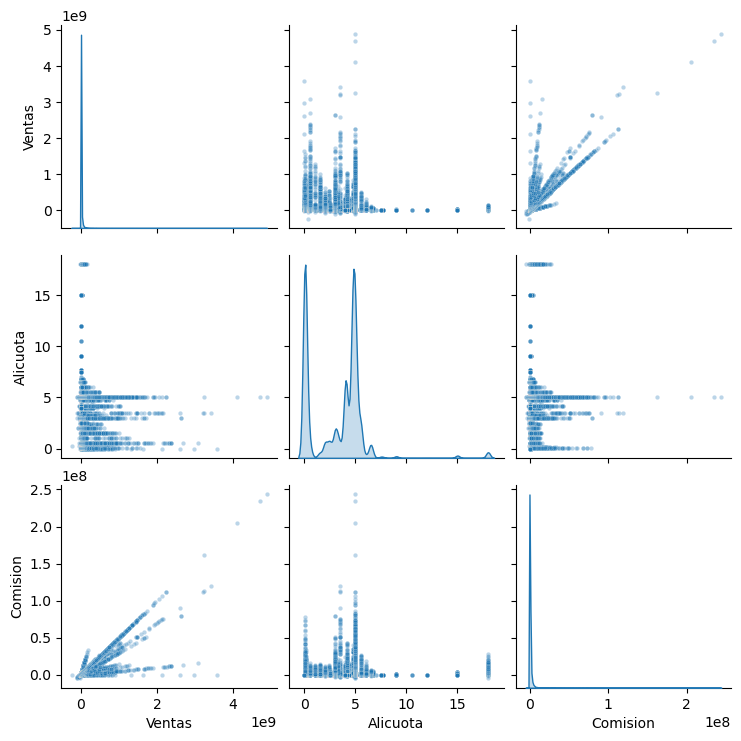

In [7]:
sns.pairplot(data=ven_num, diag_kind='kde', plot_kws = {'alpha': 0.3, 's': 10})
plt.show()

#### Cálculo y Visualización de la matriz de correlación entre las variables

<Axes: >

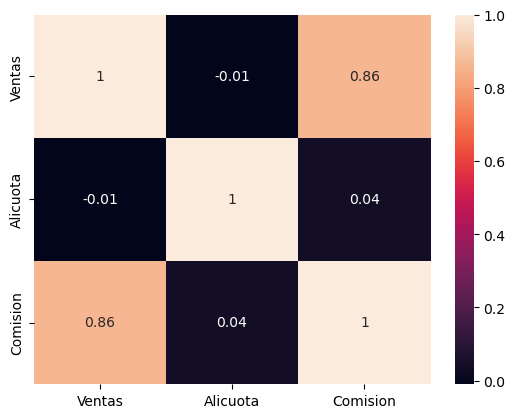

In [70]:
matrix = ven_num[['Ventas', 'Alicuota', 'Comision']].corr().round(2)
sns.heatmap(matrix, annot=True)

### Discriminando por ventas nulas

#### DataFrame con todas las ventas nulas

In [8]:
ven_num_null = ven_num[ven_num['Ventas'] == 0].copy()
ven_num_null.describe().T

,count,mean,std,min,25%,50%,75%,max
Ventas,181058.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Alicuota,181058.0,3.494798,2.581325,0.0,0.5,4.6,4.75,18.0
Comision,181058.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


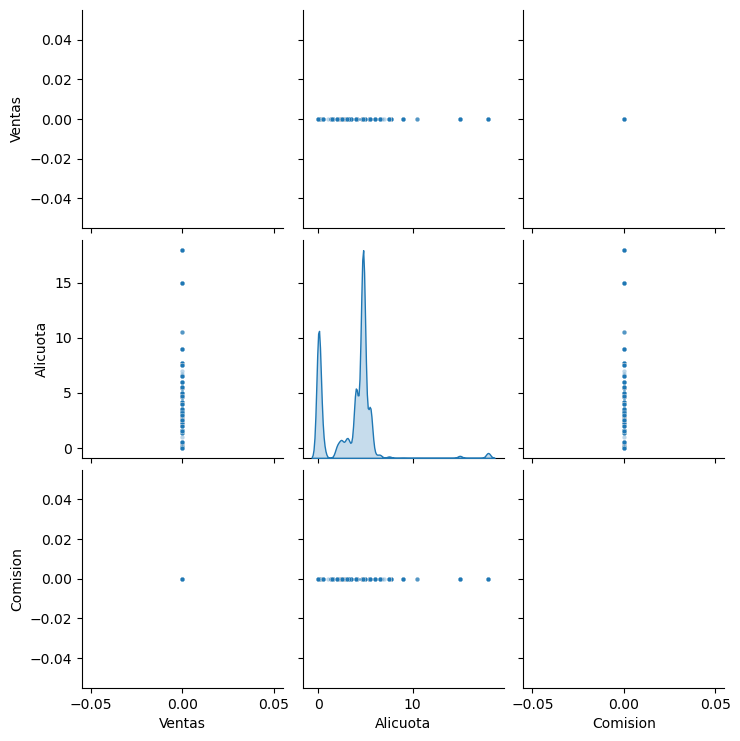

In [9]:
sns.pairplot(data=ven_num_null, diag_kind='kde', plot_kws = {'alpha': 0.3, 's': 10})
plt.show()

#### DataFrame con todas las ventas no nulas

In [10]:
ven_num_not = ven_num[ven_num['Ventas'] != 0].copy()
ven_num_not.describe().T

,count,mean,std,min,25%,50%,75%,max
Ventas,250448.0,1.299812e+07,6.293460e+07,-2.399305e+08,355230.0875,2187051.770,8598866.900,4.876872e+09
Alicuota,250448.0,3.034677e+00,2.734824e+00,0.000000e+00,0.0500,4.000,5.000,1.800000e+01
Comision,250448.0,5.062686e+05,2.419940e+06,-4.904327e+06,13538.9750,85007.375,343067.555,2.438436e+08


In [11]:
print('z-Score de los extremos de la variables numéricas:') 
for col in num_cols:
    zScore_min = (ven_num_not[col].min() - ven_num_not[col].mean()) / ven_num_not[col].std()
    zScore_max = (ven_num_not[col].max() - ven_num_not[col].mean()) / ven_num_not[col].std()

    print(f'\t{col}:')
    print(f'\t\t Mínimo: {zScore_min:.0f} \t Máximo: {zScore_max:.0f}')

z-Score de los extremos de la variables numéricas:
	Ventas:
		 Mínimo: -4 	 Máximo: 77
	Alicuota:
		 Mínimo: -1 	 Máximo: 5
	Comision:
		 Mínimo: -2 	 Máximo: 101


In [12]:
print('Proporción de valores negativos, nulos y positivos en las variables numéricas:') 
for col in num_cols:
    print(f'\t{col}')
    ans = len(ven_num_not[col])
    neg = len(ven_num_not[ven_num_not[col] < 0])
    nul = len(ven_num_not[ven_num_not[col] == 0])

    cant = [neg, nul, neg+nul, ans-neg-nul, ans]
    prop = [f'{100*neg/ans:.2f}%', f'{100*nul/ans:.2f}%', f'{100*(nul+neg)/ans:.2f}%', f'{100*(ans-nul-neg)/ans:.2f}%', '100.00%']
    desc = pd.DataFrame([cant, prop], columns=['Negativos', 'Nulos', 'No positivos', 'Positivos', 'Total'], index=['Cantidad', 'Proporcion'])
    display(desc)


Proporción de valores negativos, nulos y positivos en las variables numéricas:
	Ventas


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,1390,0,1390,249058,250448
Proporcion,0.56%,0.00%,0.56%,99.44%,100.00%


	Alicuota


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,0,1681,1681,248767,250448
Proporcion,0.00%,0.67%,0.67%,99.33%,100.00%


	Comision


,Negativos,Nulos,No positivos,Positivos,Total
Cantidad,1363,2428,3791,246657,250448
Proporcion,0.54%,0.97%,1.51%,98.49%,100.00%


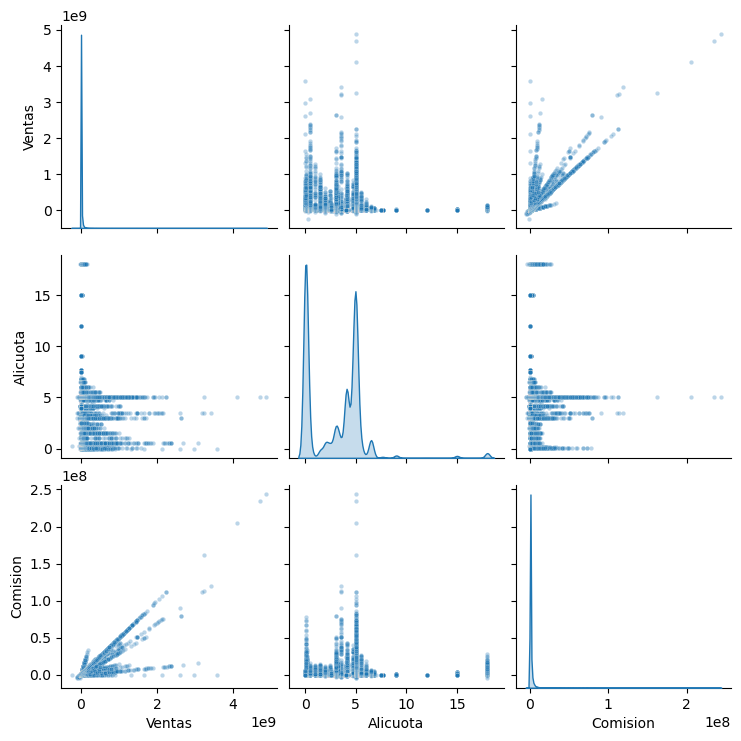

In [13]:
sns.pairplot(data=ven_num_not, diag_kind='kde', plot_kws = {'alpha': 0.3, 's': 10})
plt.show()

### Más medidas de dispersión: asimetría y Kurtosis

In [14]:
asim = skew(ven_num_not)
asimtest = skewtest(ven_num_not).pvalue
kurt = kurtosis(ven_num_not)
kurttest = kurtosistest(ven_num_not).pvalue

desc = pd.DataFrame({'Asimetría': asim, 'p-val Asim.': asimtest,
                     'Kurtosis (Fisher)': kurt, 'p-val Kurt.': kurttest},
                     index=['Ventas', 'Alicuota', 'Comision'])
desc

,Asimetría,p-val Asim.,Kurtosis (Fisher),p-val Kurt.
Ventas,22.975940,0.0,893.087110,0.0
Alicuota,1.402282,0.0,6.290852,0.0
Comision,27.418292,0.0,1485.255741,0.0


### Interpretación de la relación entre variables numéricas con etiquetas categóricas

In [15]:
ventas_null = ventas[ventas['Ventas'] == 0].copy()
ventas_not = ventas[ventas['Ventas'] != 0].copy()

#### Ventas nulas

In [16]:
# # Estas gráficas tardan bastante en generarse, descomentar para obtenerlas

# for col in ['Categoria', 'Trat_Fisc_Agg', 'Trat_Fisc', 'Trat_Dif', 'CM', 'Modelo']:
#     sns.pairplot(data=ventas_null[num_cols+[col]], diag_kind='kde', hue=col, plot_kws = {'alpha': 0.3, 's': 10})
#     plt.show()

#### Ventas no nulas

In [17]:
# # Estas gráficas tardan bastante en generarse, descomentar para obtenerlas

# for col in ['Categoria', 'Trat_Fisc_Agg', 'Trat_Fisc', 'Trat_Dif', 'CM', 'Modelo']:
#     sns.pairplot(data=ventas_not[num_cols+[col]], diag_kind='kde', hue=col, plot_kws = {'alpha': 0.3, 's': 10})
#     plt.show()

#### Ventas no nulas: más detalle con las etiquetas de `Categoria`

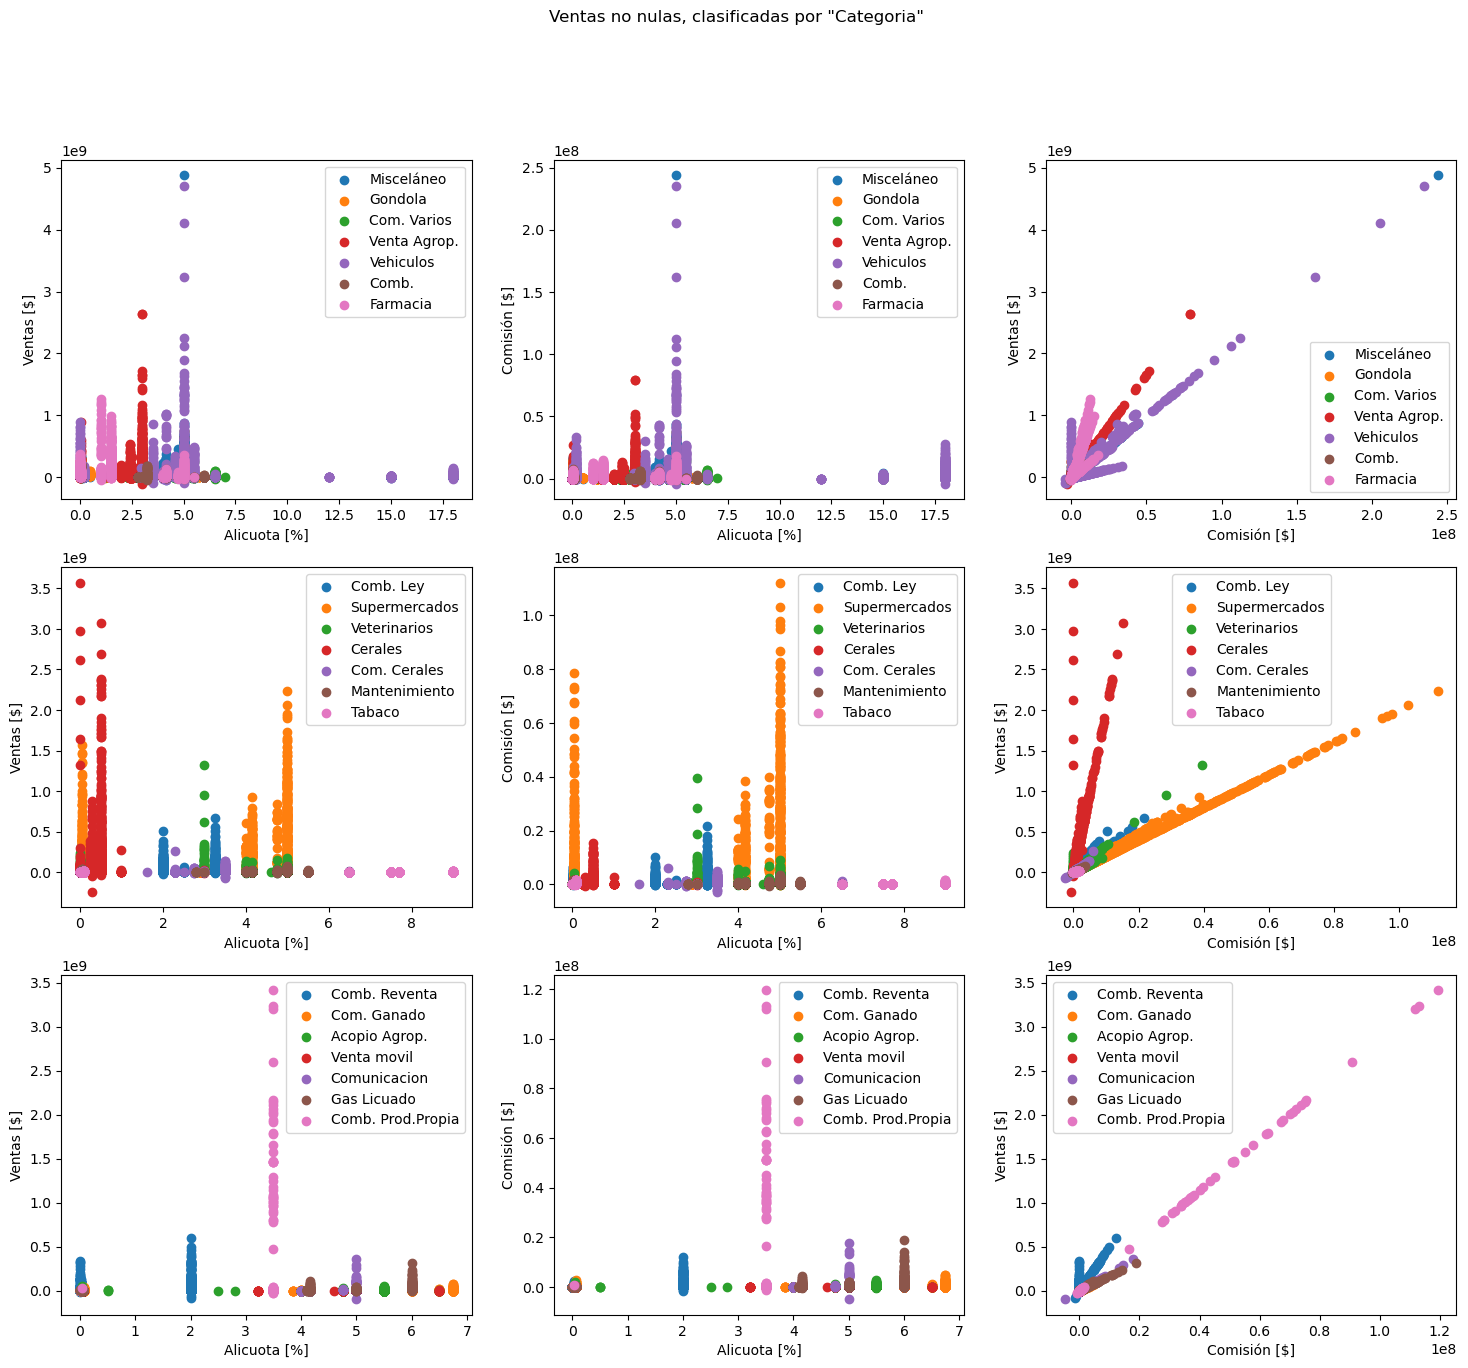

In [18]:
catG1 = ['Misceláneo', 'Gondola', 'Com. Varios', 'Venta Agrop.', 'Vehiculos', 
         'Comb.', 'Farmacia']
catG2 = ['Comb. Ley', 'Supermercados', 'Veterinarios', 'Cerales', 
         'Com. Cerales', 'Mantenimiento', 'Tabaco']
catG3 = ['Comb. Reventa', 'Com. Ganado', 'Acopio Agrop.', 'Venta movil', 
         'Comunicacion', 'Gas Licuado', 'Comb. Prod.Propia']

fig, axs = plt.subplots(3, 3, figsize=(18, 15))

fig.suptitle('Ventas no nulas, clasificadas por "Categoria"')

for k in range(7):
    # alicuota vs ventas
    axs[0, 0].scatter(ventas_not[ventas_not['Categoria'] == catG1[k]]['Alicuota'], 
                    ventas_not[ventas_not['Categoria'] == catG1[k]]['Ventas'], 
                    label=catG1[k])
    axs[0, 1].scatter(ventas_not[ventas_not['Categoria'] == catG1[k]]['Alicuota'], 
                    ventas_not[ventas_not['Categoria'] == catG1[k]]['Comision'], 
                    label=catG1[k])
    axs[0, 2].scatter(ventas_not[ventas_not['Categoria'] == catG1[k]]['Comision'], 
                    ventas_not[ventas_not['Categoria'] == catG1[k]]['Ventas'], 
                    label=catG1[k])
    
    axs[1, 0].scatter(ventas_not[ventas_not['Categoria'] == catG2[k]]['Alicuota'], 
                    ventas_not[ventas['Categoria'] == catG2[k]]['Ventas'], 
                    label=catG2[k])
    axs[1, 1].scatter(ventas[ventas['Categoria'] == catG2[k]]['Alicuota'], 
                    ventas_not[ventas_not['Categoria'] == catG2[k]]['Comision'], 
                    label=catG2[k])
    axs[1, 2].scatter(ventas_not[ventas_not['Categoria'] == catG2[k]]['Comision'], 
                    ventas_not[ventas_not['Categoria'] == catG2[k]]['Ventas'], 
                    label=catG2[k])
    
    axs[2, 0].scatter(ventas_not[ventas_not['Categoria'] == catG3[k]]['Alicuota'], 
                    ventas_not[ventas_not['Categoria'] == catG3[k]]['Ventas'], 
                    label=catG3[k])
    axs[2, 1].scatter(ventas_not[ventas_not['Categoria'] == catG3[k]]['Alicuota'], 
                    ventas_not[ventas_not['Categoria'] == catG3[k]]['Comision'], 
                    label=catG3[k])
    axs[2, 2].scatter(ventas_not[ventas_not['Categoria'] == catG3[k]]['Comision'], 
                    ventas_not[ventas_not['Categoria'] == catG3[k]]['Ventas'], 
                    label=catG3[k])

axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[1, 2].legend()
axs[2, 0].legend()
axs[2, 1].legend()
axs[2, 2].legend()

axs[0, 0].set_xlabel('Alicuota [%]')
axs[1, 0].set_xlabel('Alicuota [%]')
axs[2, 0].set_xlabel('Alicuota [%]')
axs[0, 1].set_xlabel('Alicuota [%]')
axs[1, 1].set_xlabel('Alicuota [%]')
axs[2, 1].set_xlabel('Alicuota [%]')
axs[0, 2].set_xlabel('Comisión [$]')
axs[1, 2].set_xlabel('Comisión [$]')
axs[2, 2].set_xlabel('Comisión [$]')

axs[0, 0].set_ylabel('Ventas [$]')
axs[1, 0].set_ylabel('Ventas [$]')
axs[2, 0].set_ylabel('Ventas [$]')
axs[0, 1].set_ylabel('Comisión [$]')
axs[1, 1].set_ylabel('Comisión [$]')
axs[2, 1].set_ylabel('Comisión [$]')
axs[0, 2].set_ylabel('Ventas [$]')
axs[1, 2].set_ylabel('Ventas [$]')
axs[2, 2].set_ylabel('Ventas [$]')


plt.show()

#### Convenio multilateral y el vendedor 1638: generación de datasets más pequeños

In [19]:
ventas_CM = ventas[ventas['CM'] == 1].copy()
ventas_CM['ID'].value_counts()

ID
1638    42
Name: count, dtype: int64

In [20]:
ventas_ID = ventas[ventas['ID'] == 1638].copy()
for col in ['DGR', 'Categoria', 'Trat_Fisc_Agg', 'Trat_Fisc', 'Trat_Dif', 'Año', 'Mes', 
            'Deposito', 'Ventas', 'Alicuota', 'Comision', 'Modelo']:
    print(f'\n\n{col}')
    print(ventas_ID[col].value_counts())



DGR
DGR
1638    42
Name: count, dtype: int64


Categoria
Categoria
Misceláneo    42
Name: count, dtype: int64


Trat_Fisc_Agg
Series([], Name: count, dtype: int64)


Trat_Fisc
Trat_Fisc
Norm    42
Name: count, dtype: int64


Trat_Dif
Trat_Dif
No    42
Name: count, dtype: int64


Año
Año
2019    12
2020    12
2021    12
2022     6
Name: count, dtype: int64


Mes
Mes
1     4
2     4
3     4
4     4
5     4
6     4
7     3
8     3
9     3
10    3
11    3
12    3
Name: count, dtype: int64


Deposito
Deposito
154    42
Name: count, dtype: int64


Ventas
Ventas
0.0    42
Name: count, dtype: int64


Alicuota
Alicuota
4.75    30
0.00     6
4.00     6
Name: count, dtype: int64


Comision
Comision
0.0    42
Name: count, dtype: int64


Modelo
Modelo
0    42
Name: count, dtype: int64


In [21]:
var = ['DGR', 'Categoria', 'Deposito', 'Comision']
val = [1638, 'Misceláneo', 154, 0.0]

for k in range(4):
    print(f'\n\n{var[k]}')
    sas = ventas[ventas[var[k]] == val[k]].copy()
    print(sas['ID'].value_counts())



DGR
ID
1638    42
Name: count, dtype: int64


Categoria
ID
501     882
90      778
267     516
1533    514
888     489
       ... 
3002      1
2802      1
1248      1
1457      1
1220      1
Name: count, Length: 1965, dtype: int64


Deposito
ID
701     50
963     45
373     42
1523    42
1630    42
1796    42
521     42
1638    42
387     42
1366    42
1076    42
1084    42
984     42
783     42
1254    39
2069    25
643     22
1533    20
888     17
974     16
146     15
2992     9
2830     6
Name: count, dtype: int64


Comision
ID
888     1077
520      991
90       978
1        930
526      928
        ... 
2927       1
1057       1
1707       1
2549       1
2426       1
Name: count, Length: 2570, dtype: int64


In [22]:
ventas_ID = ventas_ID.sort_values(['Año', 'Mes']).reset_index(drop=True)
ventas_ID = ventas_ID.drop(['CM'], axis=1)
print(ventas_ID.shape)

# Descomentar sólo cuando se desee guardar
# ventas_ID.to_csv('./vendedor1638_CM_13Cols_42Regs.csv')

(42, 13)


In [23]:
ventas_not = ventas_not.sort_values(['Año', 'Mes', 'Ventas']).reset_index(drop=True)
ventas_not = ventas_not.drop(['CM'], axis=1)
print(ventas_not.shape)

# Descomentar sólo cuando se desee guardar
# ventas_not.to_csv('./ventas_noNulas_13Cols_250448Regs.csv')

(250448, 13)


In [24]:
ventas_null = ventas_null[ventas_null['ID'] != 1638].copy()
ventas_null = ventas_null.sort_values(['Año', 'Mes', 'Ventas']).reset_index(drop=True)
ventas_null = ventas_null.drop(['CM'], axis=1)
print(ventas_null.shape)

# Descomentar sólo cuando se desee guardar
# ventas_null.to_csv('./ventas_Nulas_13Cols_181016Regs.csv')

(181016, 13)


### Análisis de la relación entre variables numéricas

#### Ventas nulas

In [25]:
# Relación lineal: comision = alicuota x venta
calcCom_null = ventas_null['Alicuota'] * ventas_null['Ventas']

L = len(calcCom_null)
S = sum(abs(ventas_null['Comision'] - calcCom_null) == 0)
print(f'{S} de {L} registros cumplen la relación >> {100*(S)/L:.2f}%')
print(f'{L-S} registros no la cumplen la relación >> {100*(L-S)/L:.2f}%')

181016 de 181016 registros cumplen la relación >> 100.00%
0 registros no la cumplen la relación >> 0.00%


#### Ventas no nulas

In [26]:
# Relación lineal: comision = alicuota x venta
calcCom_not = ventas_not['Alicuota'] * ventas_not['Ventas']

diff = ventas_not['Comision'] - calcCom_not
D = len(diff)
L = len(calcCom_not)
S = sum(abs(diff) == 0)
print(f'{S} registros cumplen la relación >>> {100*(S)/L:.2f}%')
print(f'{L-S} registros no la cumplen la relación >>> {100*(L-S)/L:.2f}%')
sobre = len(diff[diff<0])
print(f'\t{sobre} registros sobreestiman la relación >>> {100*sobre/D:.2f}%')
sub = len(diff[diff>0])
print(f'\t{sub} registros subestiman la relación >>> {100*sub/D:.2f}%')

9941 registros cumplen la relación >>> 3.97%
240507 registros no la cumplen la relación >>> 96.03%
	205162 registros sobreestiman la relación >>> 81.92%
	35345 registros subestiman la relación >>> 14.11%


In [27]:
com_real_sobre = ventas_not['Comision'][diff<0]
com_real_exac = ventas_not['Comision'][diff==0]
com_real_sub = ventas_not['Comision'][diff>0]

com_calc_sobre = calcCom_not[diff<0]
com_calc_exac = calcCom_not[diff==0]
com_calc_sub = calcCom_not[diff>0]

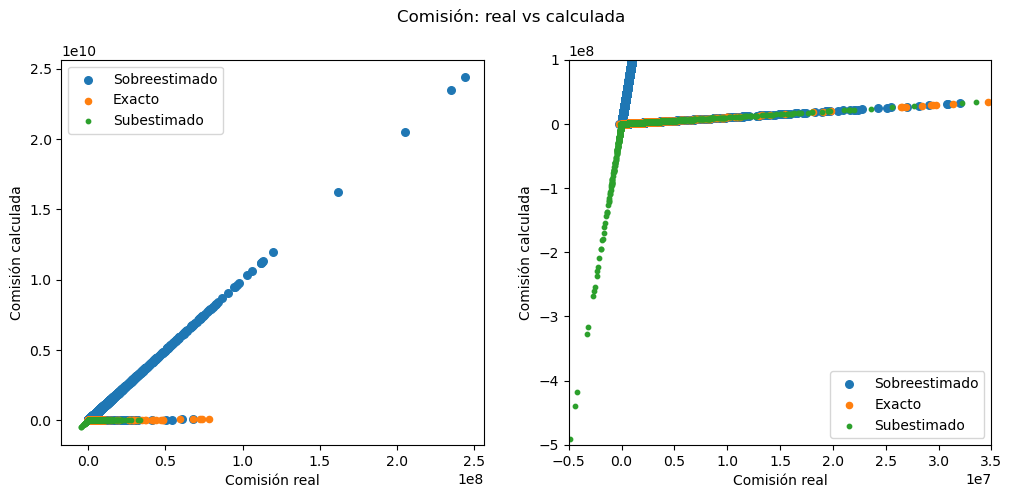

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Comisión: real vs calculada')

axs[0].scatter(com_real_sobre, com_calc_sobre, label='Sobreestimado', s=30)
axs[0].scatter(com_real_exac, com_calc_exac, label='Exacto', s=20)
axs[0].scatter(com_real_sub, com_calc_sub, label='Subestimado', s=10)

axs[0].legend()

axs[0].set_xlabel('Comisión real')
axs[0].set_ylabel('Comisión calculada')

axs[1].scatter(com_real_sobre, com_calc_sobre, label='Sobreestimado', s=30)
axs[1].scatter(com_real_exac, com_calc_exac, label='Exacto', s=20)
axs[1].scatter(com_real_sub, com_calc_sub, label='Subestimado', s=10)

axs[1].legend()
axs[1].set_ylim(-5E8, 1E8)
axs[1].set_xlim(-0.5E7, 3.5E7)

axs[1].set_xlabel('Comisión real')
axs[1].set_ylabel('Comisión calculada')

plt.show()

In [29]:
rg_real = pd.concat([com_real_sub[com_calc_sub<0], com_real_sobre[com_calc_sobre>10*com_real_sobre]])
rg_calc = pd.concat([com_calc_sub[com_calc_sub<0], com_calc_sobre[com_calc_sobre>10*com_real_sobre]])

rp_real = pd.concat([com_real_sub[com_calc_sub>0], com_real_sobre[com_calc_sobre<10*com_real_sobre], com_real_exac])
rp_calc = pd.concat([com_calc_sub[com_calc_sub>0], com_calc_sobre[com_calc_sobre<10*com_real_sobre], com_calc_exac])

In [30]:
print(f'De los {len(rp_real+rg_real)} registros:')
print(f'\t{len(rg_real)} están en la recta con pendiente grande >>> {100*len(rg_real)/len(rp_real+rg_real):.2f}%')
print(f'\t{len(rp_real)} están en la recta con pendiente pequeña >>> {100*len(rp_real)/len(rp_real+rg_real):.2f}%')

De los 250448 registros:
	167713 están en la recta con pendiente grande >>> 66.97%
	82735 están en la recta con pendiente pequeña >>> 33.03%


In [31]:
LG = LR(rg_real, rg_calc)
LP = LR(rp_real, rp_calc)

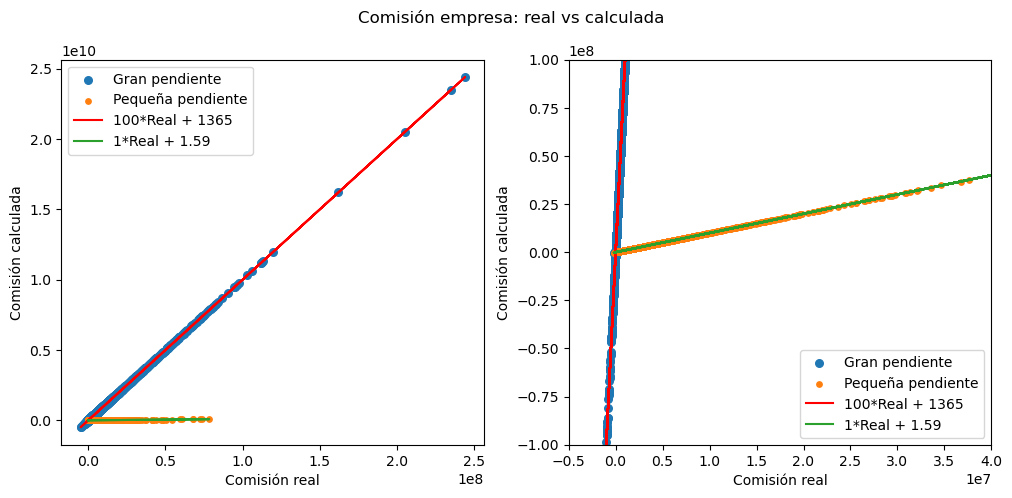

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(rg_real, rg_calc, label='Gran pendiente', s=30)
axs[0].scatter(rp_real, rp_calc, label='Pequeña pendiente', s=15)
axs[0].plot(rg_real, rg_real*LG.slope + LG.intercept, label=f'{LG.slope:.0f}*Real + {LG.intercept:.0f}', color='red')
axs[0].plot(rp_real, rp_real*LP.slope + LP.intercept, label=f'{LP.slope:.0f}*Real + {LP.intercept:.2f}', color='tab:green')

axs[0].legend(loc='upper left')

axs[0].set_xlabel('Comisión real')
axs[0].set_ylabel('Comisión calculada')

axs[1].scatter(rg_real, rg_calc, label='Gran pendiente', s=30)
axs[1].scatter(rp_real, rp_calc, label='Pequeña pendiente', s=15)
axs[1].plot(rg_real, rg_real*LG.slope + LG.intercept, label=f'{LG.slope:.0f}*Real + {LG.intercept:.0f}', color='red')
axs[1].plot(rp_real, rp_real*LP.slope + LP.intercept, label=f'{LP.slope:.0f}*Real + {LP.intercept:.2f}', color='tab:green')

axs[1].legend(loc='lower right')
axs[1].set_ylim(-1E8, 1E8)
axs[1].set_xlim(-0.5E7, 4E7)

axs[1].set_xlabel('Comisión real')
axs[1].set_ylabel('Comisión calculada')

fig.suptitle('Comisión empresa: real vs calculada')
plt.show()

#### Ventas no nulas, discriminando por vendedores Modelo

In [33]:
mask0 = ventas_not['Modelo']==0
mask1 = ventas_not['Modelo']==1

In [34]:
com_real_Mod = ventas_not['Comision'][mask1]
com_real_noMod = ventas_not['Comision'][mask0]

com_calc_Mod = calcCom_not[mask1]
com_calc_noMod = calcCom_not[mask0]

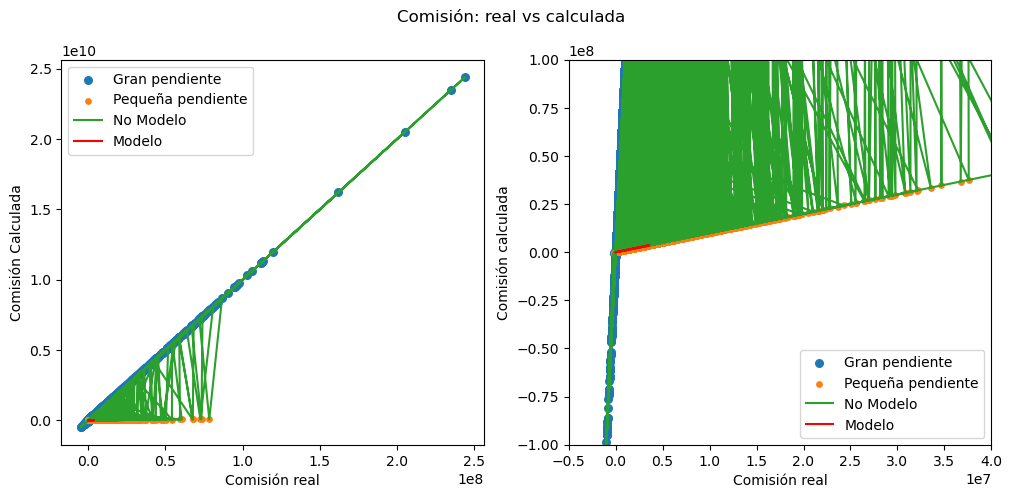

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(rg_real, rg_calc, label='Gran pendiente', s=30)
axs[0].scatter(rp_real, rp_calc, label='Pequeña pendiente', s=15)
axs[0].plot(com_real_noMod, com_calc_noMod, label='No Modelo', color='tab:green')
axs[0].plot(com_real_Mod, com_calc_Mod, label='Modelo', color='red')

axs[0].legend(loc='upper left')

axs[0].set_xlabel('Comisión real')
axs[0].set_ylabel('Comisión Calculada')

axs[1].scatter(rg_real, rg_calc, label='Gran pendiente', s=30)
axs[1].scatter(rp_real, rp_calc, label='Pequeña pendiente', s=15)
axs[1].plot(com_real_noMod, com_calc_noMod, label='No Modelo', color='tab:green')
axs[1].plot(com_real_Mod, com_calc_Mod, label='Modelo', color='red')

axs[1].legend(loc='lower right')
axs[1].set_ylim(-1E8, 1E8)
axs[1].set_xlim(-0.5E7, 4E7)

axs[1].set_xlabel('Comisión real')
axs[1].set_ylabel('Comisión calculada')

fig.suptitle('Comisión: real vs calculada')
plt.show()

---
# Análisis de variables categóricas

#### Relación entre `Trat_Fisc` y `Trat_Fisc_Agg`

Queremos chequear para qué valores de `Trat_Fisc` aparecen valores de `Trat_Fisc_Agg`. Al analizar la tabla de contingencia, vemos que los valores de `Trat_Fisc_Agg` sólo aparecen cuando `Trat_Fisc` asume valores 0, 1, 2 ó 3. A su vez, hay correspondencia entre 0 y Normal, 1 y Exento/Desgravado, 2 y Minorista, 3 y Otro Tratamiento Fiscal. ¿Se puede unificar todo como `Trat_Fisc`, eliminando entonces `Trat_Fisc_Agg`? ¿Tiene sentido que falte la descripción asociada al tratamiento?

In [37]:
# Este paso lo agrego porque sino el crosstab siguiente no me muestra los NaN
prueba3 = ventas_not.copy()
prueba3['Trat_Fisc'] = prueba3['Trat_Fisc'].fillna('Waring: Relleno')
prueba3['Trat_Fisc_Agg'] = prueba3['Trat_Fisc_Agg'].fillna('Waring: Relleno')

In [38]:
pd.crosstab(prueba3['Trat_Fisc'], prueba3['Trat_Fisc_Agg'], dropna=False)

Trat_Fisc_Agg,Exento,Min,Norm,Otro,Waring: Relleno
Trat_Fisc,,,,,
0,0,0,71072,0,0
1,487,0,0,0,0
2,0,2,0,0,0
3,0,0,0,5575,0
Alic.Agrav,0,0,0,0,81506
Alic.Reduc,0,0,0,0,988
Esp.1,0,0,0,0,5180
Esp.2,0,0,0,0,4085
Esp.3,0,0,0,0,613


#### Relación entre `Trat_Fisc` y `Trat_Dif`

Ahora veamos para qué valores de `Trat_Fisc` aparecen valores de `Trat_Dif`. Al analizar la tabla de contingencia vemos que no hay un patrón claro. ¿Podríamos tomar a un dato faltante como "sin tratamiento" o algo por el estilo?

In [39]:
# Este paso lo agrego porque sino el crosstab siguiente no me muestra los NaN
prueba3['Trat_Dif'] = prueba3['Trat_Dif'].fillna('Waring: Relleno')

In [40]:
pd.crosstab(prueba3['Trat_Fisc'], prueba3['Trat_Dif'], dropna=False)

Trat_Dif,Art.16,Art.17,Art.18,Art.19,Art.19+20,Art.20,Art.21,Art.22,Art.28,Art.31,Art.34,No
Trat_Fisc,,,,,,,,,,,,
0,370,122,838,614,1802,1812,5124,188,67,389,925,58821
1,0,0,2,35,0,5,128,0,0,1,0,316
2,0,0,0,0,0,0,0,0,0,0,0,2
3,0,95,25,532,996,52,2959,671,0,1,0,244
Alic.Agrav,582,12,156,111,78,2596,1712,991,0,51,603,74614
Alic.Reduc,237,0,13,0,9,35,68,0,0,0,28,598
Esp.1,105,78,296,380,177,972,906,647,74,0,4,1541
Esp.2,1,0,54,0,75,325,1840,1789,0,0,0,1
Esp.3,5,0,12,0,0,548,0,0,0,0,0,48


#### `Trat_Fisc` vs `Trat_Fisc_Agg`

Vemos que sí existe una gran correlación entre "Norm" de `Trat_Fisc_Agg` y "0" de `Trat_Fisc`.

<Axes: xlabel='Trat_Fisc_Agg', ylabel='Trat_Fisc'>

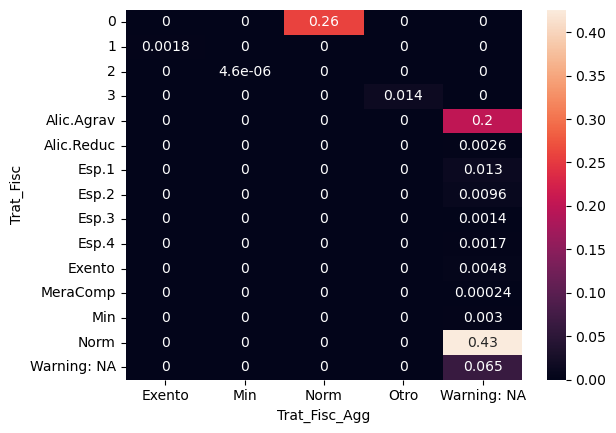

In [117]:
vad = pd.crosstab(ventas['Trat_Fisc'].fillna("Warning: NA"), ventas['Trat_Fisc_Agg'].fillna("Warning: NA"), normalize=True)
sns.heatmap(vad, annot=True)

#### Ventas totales por año y modelo.

In [64]:
agg_anio = ventas.groupby(["Año", "Modelo"])["Ventas"].agg([np.mean, np.std])
agg_anio

mean           std
Año  Modelo                            
2019 0       4.292789e+06  2.451238e+07
     1       4.811549e+06  7.880737e+06
2020 0       5.835928e+06  3.355794e+07
     1       5.360456e+06  8.587344e+06
2021 0       9.367693e+06  5.513801e+07
     1       8.784944e+06  1.432576e+07
2022 0       1.302381e+07  7.975405e+07
     1       1.211976e+07  1.920748e+07

Visualizamos el logaritmo en base 10 de las ventas, porque el valor original está muy sesgado

- Los Modelo = 1 tienen menor variablidad y mayor promedio de ventas comparados con Modelo = 0

<Axes: xlabel='Año', ylabel='Ventas'>

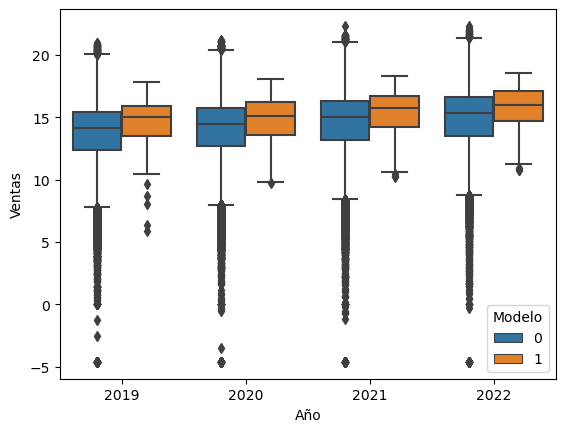

In [65]:
ventas_log10 = np.log(ventas[ventas["Ventas"] > 0]["Ventas"])
sns.boxplot(x=ventas["Año"], y=ventas_log10, hue=ventas["Modelo"])

#### Ventas por Descripción Tratamiento Fiscal


In [66]:
agg_descfiscal = ventas.groupby(["Trat_Fisc_Agg", "Modelo"])['Ventas'].agg([np.mean, np.std])
agg_descfiscal

mean           std
Trat_Fisc_Agg Modelo                            
Exento        0       5.522087e+06  1.481346e+07
              1       7.692304e+04           NaN
Min           0       2.918756e+06  7.290322e+05
Norm          0       4.807569e+06  2.263194e+07
              1       5.795930e+06  9.371864e+06
Otro          0       1.289972e+07  2.856794e+07
              1       1.853372e+07  2.528659e+07

<Axes: xlabel='Trat_Fisc_Agg', ylabel='Ventas'>

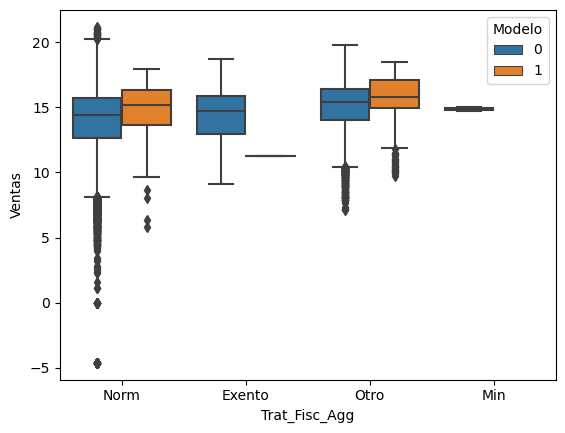

In [67]:
sns.boxplot(data=ventas, x="Trat_Fisc_Agg", y=ventas_log10, hue="Modelo")

---
## Análisis de la serie temporal

### Construcción de una nueva variable: Fecha
Consideramos que para el análisis temporal habrá momentos en que necesitamos tener Año y Mes por separado, pero en otras ocasiones necesitamos toda la información al mismo tiempo. Por lo tanto, creamos la variable Fecha:
    $$Fecha = Año + Mes$$

In [73]:
ventas['Fecha'] = pd.to_datetime(ventas['Mes'].astype(str) + '-' + ventas['Año'].astype(str), format='%m-%Y')
ventas.tail(3)

,ID,DGR,Categoria,Trat_Fisc_Agg,Trat_Fisc,Trat_Dif,CM,Año,Mes,Deposito,Ventas,Alicuota,Comision,Modelo,Fecha
431503,1402,1402,Cerales,NaN,Exento,No,0,2022,6,62,2.973916e+09,0.0,0.000000e+00,0,2022-06-01
431504,1187,1187,Comb. Prod.Propia,NaN,Norm,Art.21,0,2022,6,165,3.196690e+09,3.5,1.118842e+08,0,2022-06-01
431505,1049,1049,Vehiculos,NaN,Esp.1,Art.20,0,2022,6,32,4.697258e+09,5.0,2.348629e+08,0,2022-06-01


Vamos a considerar que la serie temporal **principal** es la dictada por `Ventas`.

### Considerando la serie temporal

#### Agrupando por Meses

Se entiende más la progresión al agrupar todos los datos correspondientes a un mismo Mes. Vemos que no hace otra cosa más que crecer. Se observa el efecto de la inflación y pareciera haber picos hacia fin de Año.

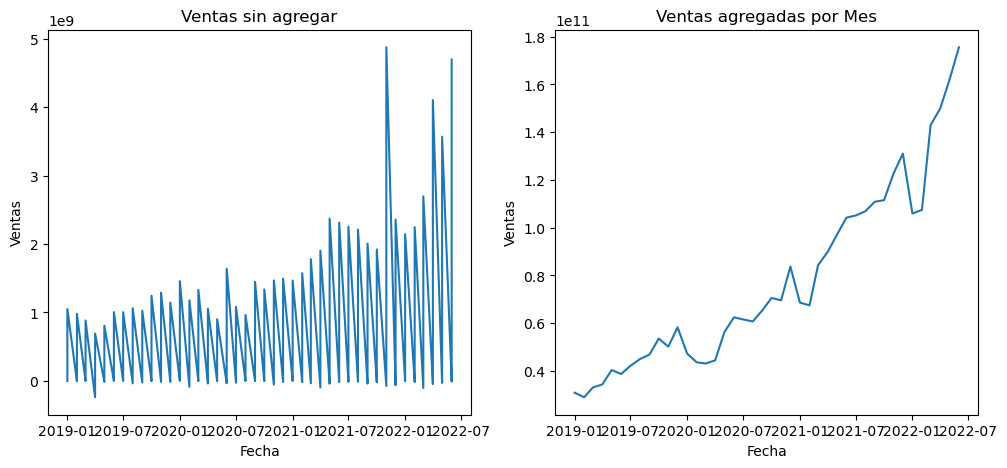

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(ventas['Fecha'],ventas['Ventas'])

axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Ventas')
axs[0].set_title('Ventas sin agregar')

prueba6 = ventas[['Fecha','Ventas', 'Año']].copy()
prueba6_agregado = prueba6.groupby('Fecha')['Ventas'].sum().reset_index()

axs[1].plot(prueba6_agregado['Fecha'], prueba6_agregado['Ventas'])

axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Ventas')
axs[1].set_title('Ventas agregadas por Mes')

plt.show()

Son más similares las tendencias desde el 2019 al 2021, mientras que 2022 se destaca por ser bien diferente.

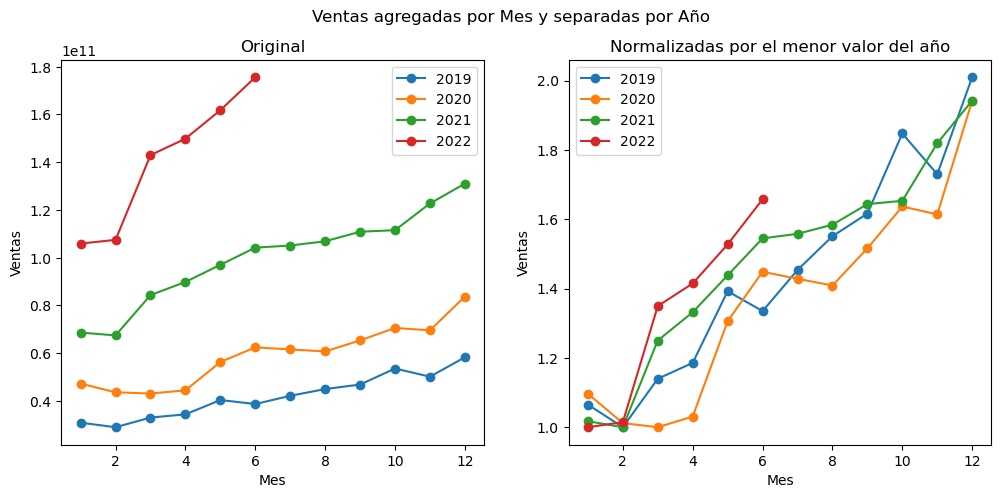

In [77]:
Mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

v19 = prueba6_agregado['Ventas'][:12]
v20 = prueba6_agregado['Ventas'][12:24]
v21 = prueba6_agregado['Ventas'][24:36]
v22 = prueba6_agregado['Ventas'][36:]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(Mes, v19, label='2019', marker='o')
axs[0].plot(Mes, v20, label='2020', marker='o')
axs[0].plot(Mes, v21, label='2021', marker='o')
axs[0].plot(Mes[:6], v22, label='2022', marker='o')

axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Ventas')
axs[0].set_title('Original')
axs[0].legend()

axs[1].plot(Mes, v19/np.min(v19), label='2019', marker='o')
axs[1].plot(Mes, v20/np.min(v20), label='2020', marker='o')
axs[1].plot(Mes, v21/np.min(v21), label='2021', marker='o')
axs[1].plot(Mes[:6], v22/np.min(v22), label='2022', marker='o')

axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Ventas')
axs[1].set_title('Normalizadas por el menor valor del año')
axs[1].legend()

fig.suptitle('Ventas agregadas por Mes y separadas por Año')

plt.show()

#### Estacionalidad un poco más definida - mensual

Se dice que una serie de tiempo es estacionaria si no aumenta o disminuye con el tiempo de forma lineal o exponencial (sin tendencias), y si no muestra ningún tipo de patrón repetitivo (sin estacionalidad). Matemáticamente, esto se describe como una media constante y una varianza constante a lo largo del tiempo. Junto con la varianza, la autocovarianza tampoco debería ser una función del tiempo.

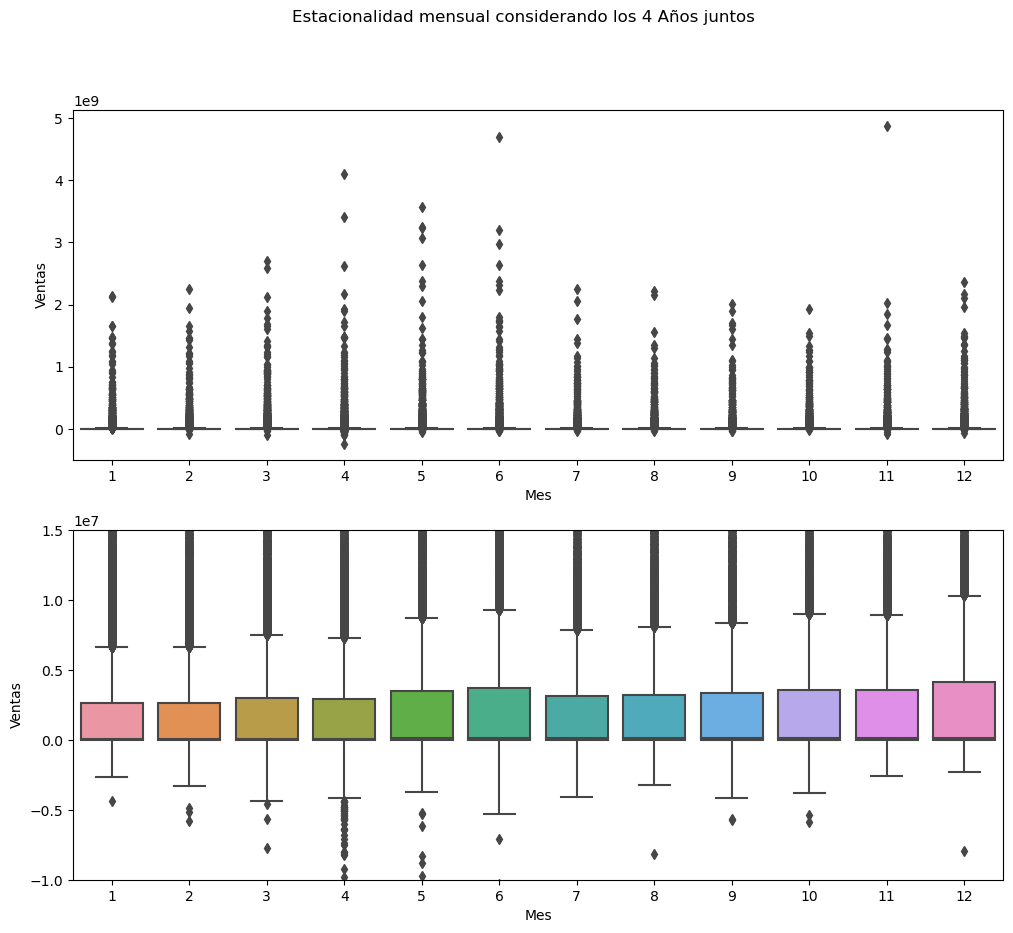

In [86]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

sns.boxplot(data=ventas, x='Mes', y='Ventas', ax=axs[0])

sns.boxplot(data=ventas, x='Mes', y='Ventas', ax=axs[1])
axs[1].set_ylim(-1E7, 1.5E7)

fig.suptitle('Estacionalidad mensual considerando los 4 Años juntos')
plt.show()

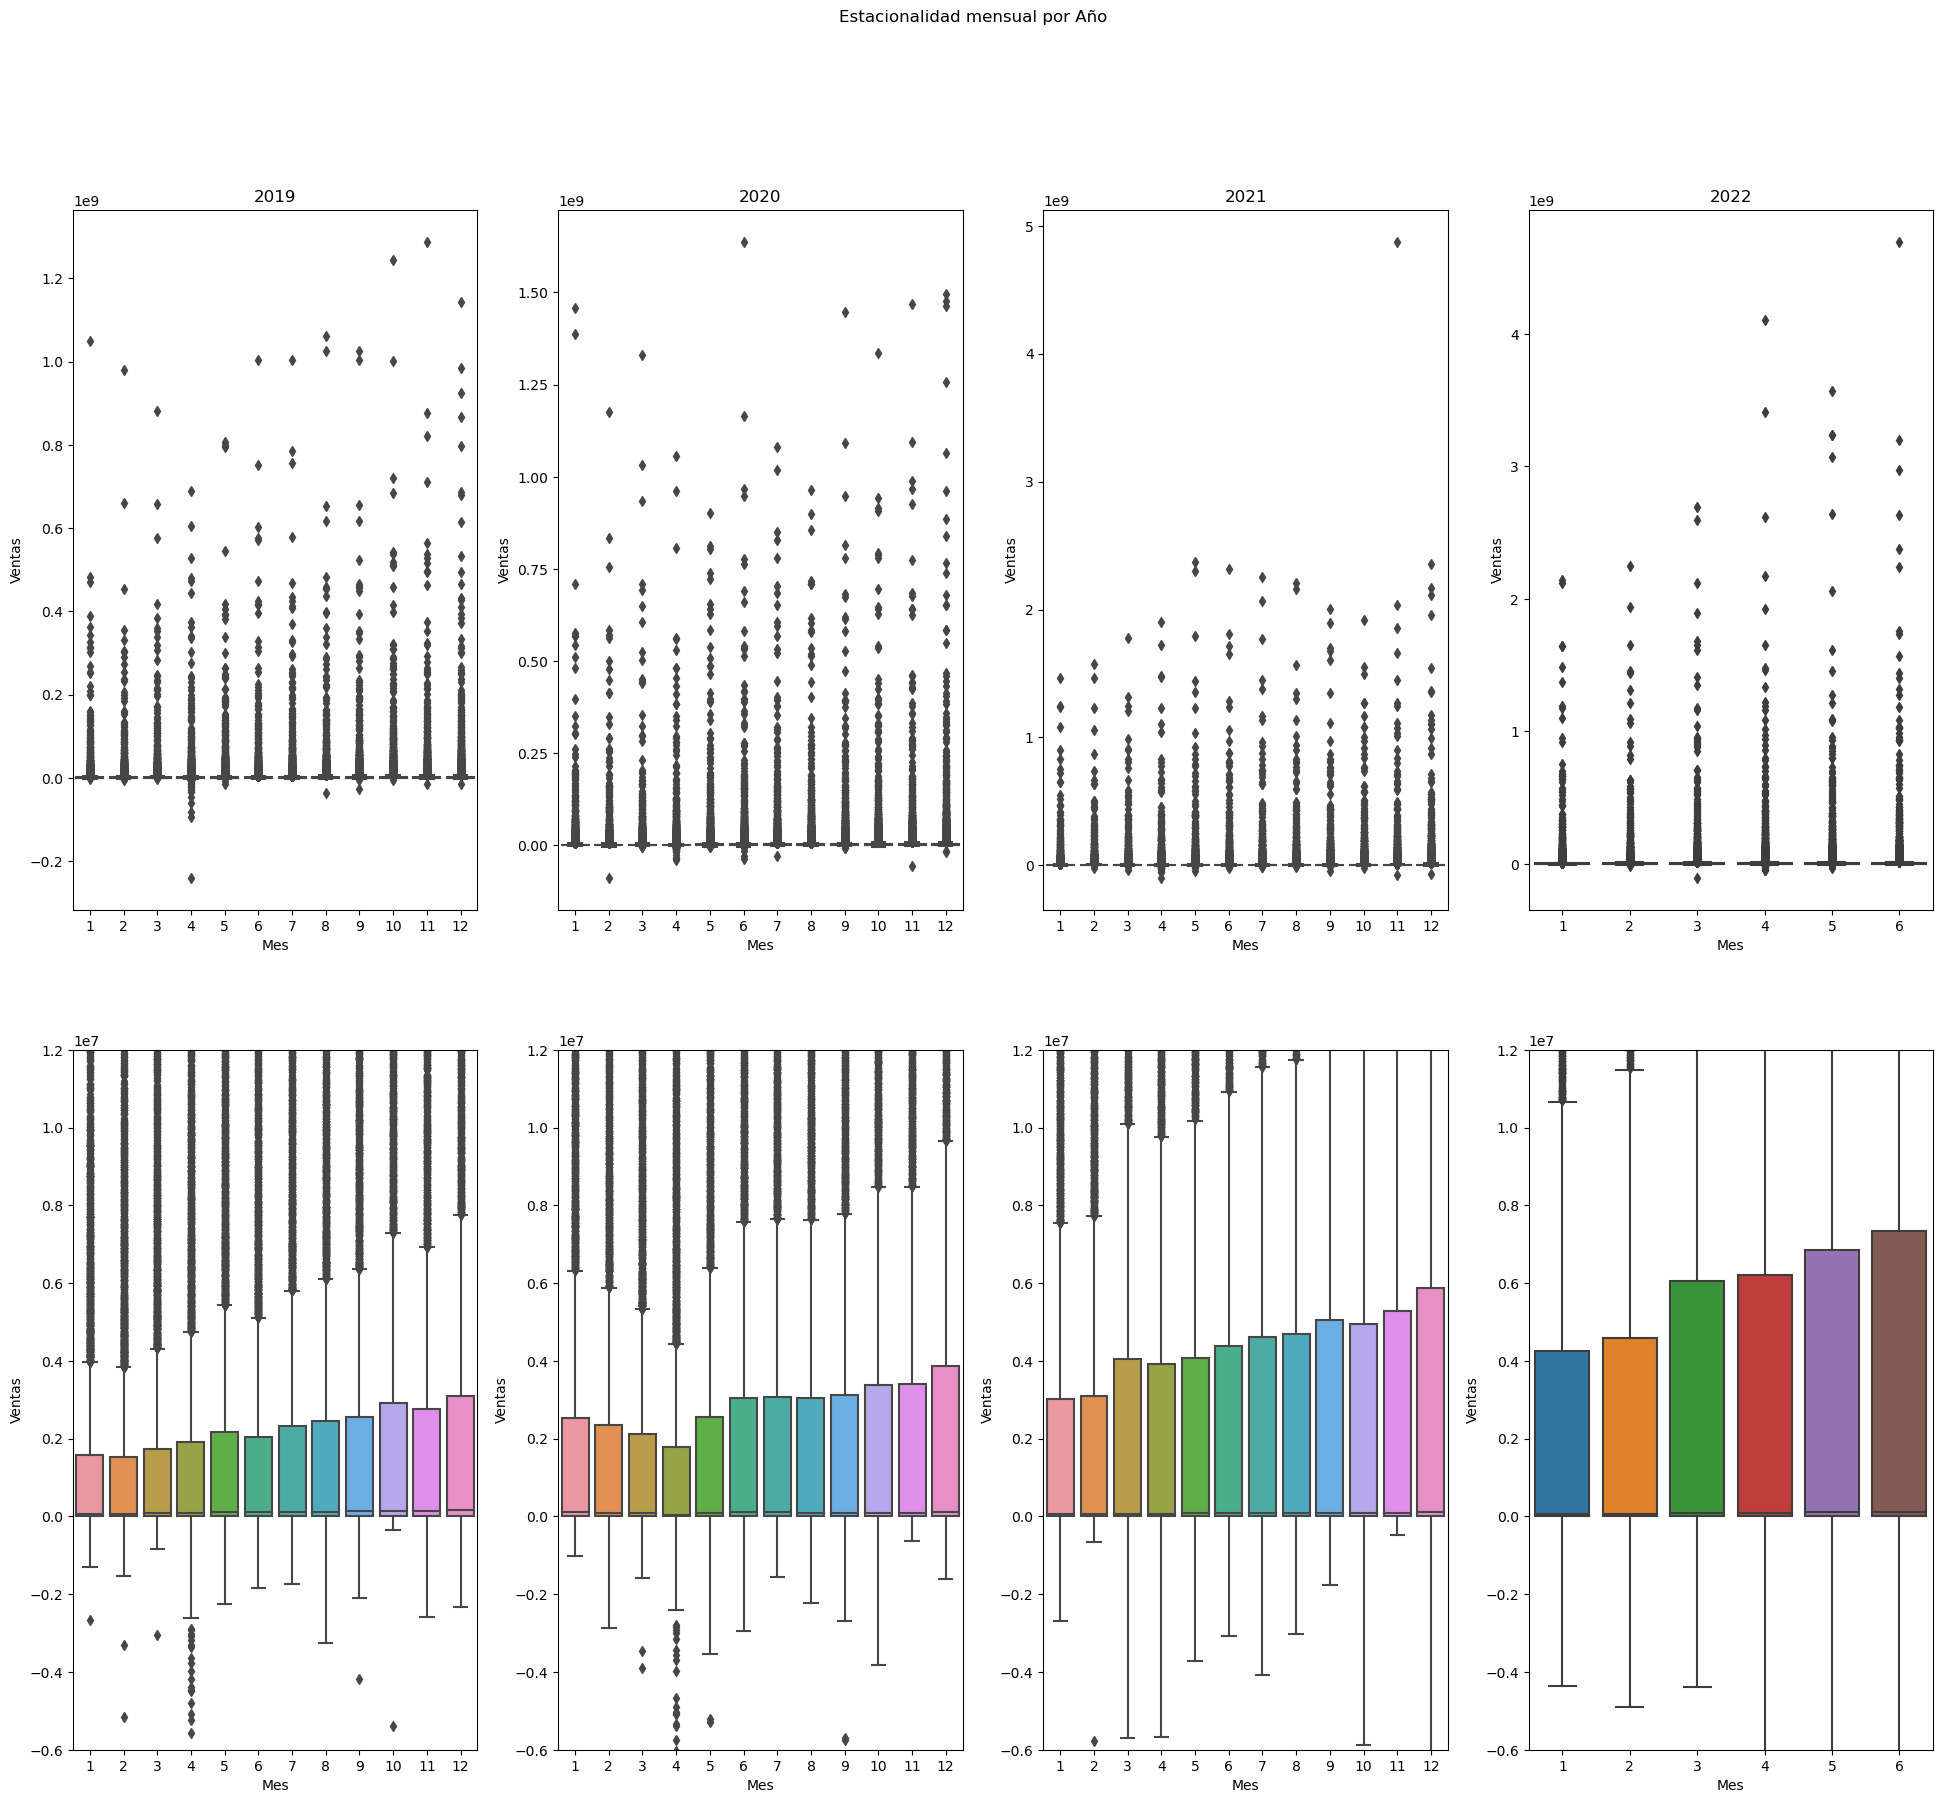

In [87]:
fig, axs = plt.subplots(2, 4, figsize=(24, 20))

sns.boxplot(data=ventas[ventas['Año']==2019], x='Mes', y='Ventas', ax=axs[0, 0])
sns.boxplot(data=ventas[ventas['Año']==2019], x='Mes', y='Ventas', ax=axs[1, 0])

sns.boxplot(data=ventas[ventas['Año']==2020], x='Mes', y='Ventas', ax=axs[0, 1])
sns.boxplot(data=ventas[ventas['Año']==2020], x='Mes', y='Ventas', ax=axs[1, 1])

sns.boxplot(data=ventas[ventas['Año']==2021], x='Mes', y='Ventas', ax=axs[0, 2])
sns.boxplot(data=ventas[ventas['Año']==2021], x='Mes', y='Ventas', ax=axs[1, 2])

sns.boxplot(data=ventas[ventas['Año']==2022], x='Mes', y='Ventas', ax=axs[0, 3])
sns.boxplot(data=ventas[ventas['Año']==2022], x='Mes', y='Ventas', ax=axs[1, 3])

axs[0, 0].set_title('2019')
axs[1, 0].set_ylim(-0.6E7, 1.2E7)

axs[0, 1].set_title('2020')
axs[1, 1].set_ylim(-0.6E7, 1.2E7)

axs[0, 2].set_title('2021')
axs[1, 2].set_ylim(-0.6E7, 1.2E7)

axs[0, 3].set_title('2022')
axs[1, 3].set_ylim(-0.6E7, 1.2E7)

fig.suptitle('Estacionalidad mensual por Año')
plt.show()

#### Análisis de Outliers
Van a tener influencia en las estadísticas centrales y de dispersión

**Negativos**

In [90]:
negativos = ventas[ventas['Ventas'] < 0]
print(f'Cantidad de valores negativos:{len(negativos)}')

Cantidad de valores negativos:1390


<Axes: xlabel='Fecha'>

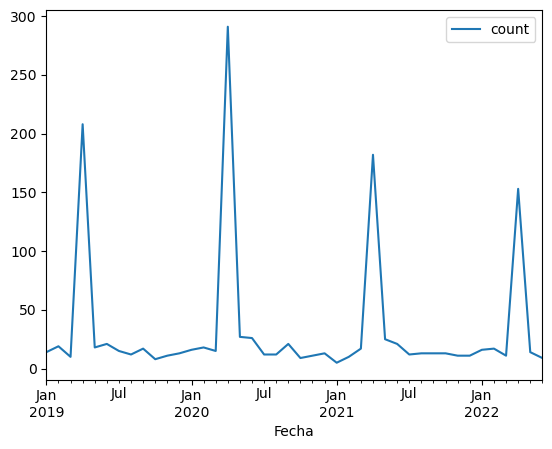

In [92]:
recuento_negativos = negativos['Fecha'].value_counts().to_frame(name='count').sort_index(ascending=True)
recuento_negativos.plot()

**Ceros**

In [93]:
ceros = ventas[ventas['Ventas'] == 0]
print(f'Cantidad de ceros: {len(ceros)}')

Cantidad de ceros: 181058


<Axes: xlabel='Fecha'>

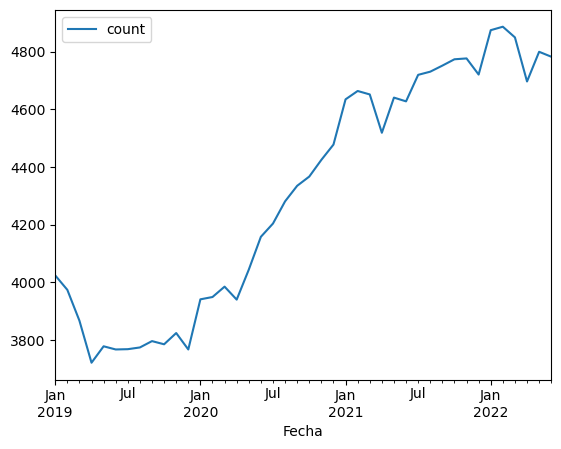

In [99]:
recuento_ceros = ceros['Fecha'].value_counts().to_frame(name='count').sort_index(ascending=True)
recuento_ceros.plot()

**Extremos positivos**

In [102]:
percentil_98 = ventas['Ventas'].quantile(0.98)
extremos = ventas[ventas['Ventas'] > percentil_98]
print(f'Cantidad de valores por encima del percentil 98: {len(extremos)}')

Cantidad de valores por encima del percentil 98: 8631


<Axes: xlabel='Fecha'>

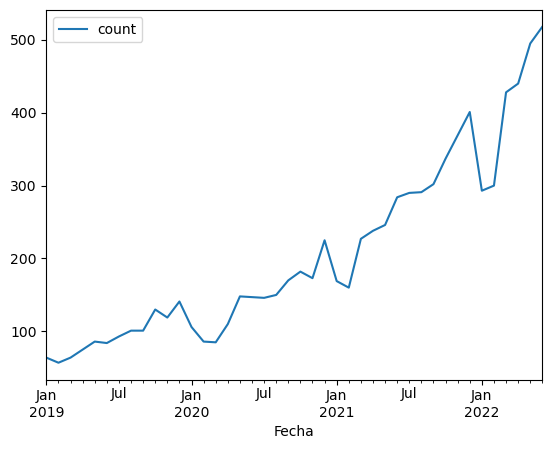

In [106]:
recuento_extremos = extremos['Fecha'].value_counts().to_frame(name='count').sort_index(ascending=True)
recuento_extremos.plot()

#### Autocorrelación

Hay correlación estadísticamente significativa para los lags 1, 2 y 3, lo que implica que observaciones pasadas influyen en las observaciones actuales de la serie temporal de manera positiva.

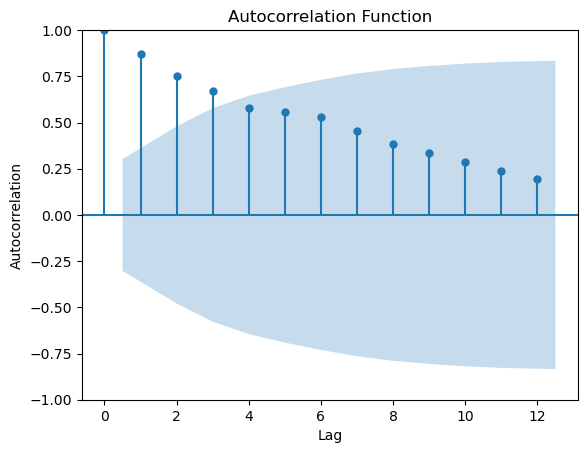

In [48]:
# Calcular la función de autocorrelación
acf = plot_acf(prueba6_agregado['Ventas'], lags=12)

# Graficar la función de autocorrelación
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()